In [1]:
import sys
sys.path.append('../')
import env

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression as LR

In [3]:
READ_FILE = '2D_per_time'
target_csv_list = ['od', 'estimate']
target_time = '3600'

In [4]:
def main(args, array):
    for _times in env.TIMES_LIST():
        df = pd.read_csv(env.get_full_path(READ_FILE, args, any=_times),
                         encoding='Shift_JISx0213')

        array[args.dir][args.ratio][args.seed][args.csv][_times]= df

csv_array = {}
env.for_default_init(main, csv_array, target_csv_list)

0.47039218061622723


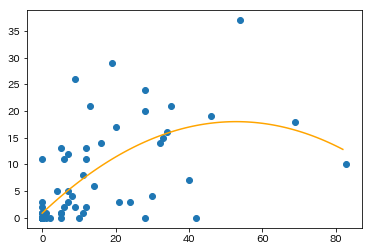

In [5]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import PolynomialFeatures

_dir = 'p10000'
_ratio = 'r4'
_seed = 's123'
df = csv_array[_dir][_ratio][_seed].copy()

for _times in [target_time]:
    trainX = df[target_csv_list[0]][_times]['people'].values.reshape(-1, 1)
    trainY = df[target_csv_list[1]][_times]['people'].values.reshape(-1, 1)

    quadratic = PolynomialFeatures(degree = 2)
    X_quad = quadratic.fit_transform(trainX)
    X_fit = np.arange(trainX.min(), trainX.max(), 1)[:, np.newaxis]
    model = LR()

    # 2次の項を追加、予測値、R^2を評価
    mod_quad = model.fit(X_quad, trainY)
    y_quad_fit = mod_quad.predict(quadratic.fit_transform(X_fit))
    r2_quad = model.score(X_quad, trainY)

#     plt.figure(dpi=600)
    plt.scatter(trainX, trainY)
    plt.plot(X_fit, y_quad_fit, 'orange')
    print(r2_quad)

0.5663681777030534


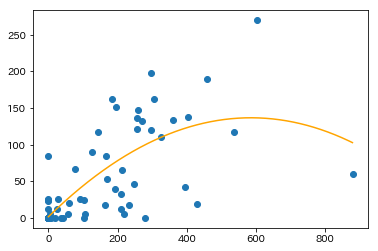

In [20]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import PolynomialFeatures

_dir = 'p10000'
_ratio = 'r4'
_seed = 's123'
df = csv_array[_dir][_ratio][_seed].copy()

trainX = df[target_csv_list[0]][_times]['people'].copy()
trainY = df[target_csv_list[1]][_times]['people'].copy()
for _times in env.TIMES_LIST()[1:]:
    trainX += df[target_csv_list[0]][_times]['people'].copy()
    trainY += df[target_csv_list[1]][_times]['people'].copy()

    
trainX = trainX.values.reshape(-1, 1)
trainY = trainY.values.reshape(-1, 1)

quadratic = PolynomialFeatures(degree = 2)
X_quad = quadratic.fit_transform(trainX)
X_fit = np.arange(trainX.min(), trainX.max(), 1)[:, np.newaxis]
model = LR()

# 2次の項を追加、予測値、R^2を評価
mod_quad = model.fit(X_quad, trainY)
y_quad_fit = mod_quad.predict(quadratic.fit_transform(X_fit))
r2_quad = model.score(X_quad, trainY)

# plt.figure(figsize=(9,6), dpi=600)
plt.scatter(trainX, trainY)
plt.plot(X_fit, y_quad_fit, 'orange')
# plt.savefig('p10000r4s123corrlation_od_estimate.png')
print(r2_quad)

## def create_base_dataframe():
    df = pd.DataFrame(columns=(['{0:02d}'.format(i*10) for i in range(env.AREA_ONE_LENGTH())]))
    return df

# エリア番号を線形的な数から、iとjで回した数のようにする
def convert_area_to_contour(base, read):
    for r in np.asanyarray(read):
        area_id = int(r[1])
        row = str(area_id // env.AREA_ONE_LENGTH())
        col = str(area_id % env.AREA_ONE_LENGTH()) + '0'
        base.loc[row, col] = r[2]
        
    return base

def main(args, array):
    base = create_base_dataframe()
    df = pd.read_csv(env.get_full_path('2D_per_time', args, target_time),
                                                        encoding='Shift_JISx0213')
    df['time'] = df['time'].apply(lambda x: str(int(x)))

    group_list = df.groupby(['time'], sort=False)
    for _times, _group in group_list:
        df = convert_area_to_contour(base.copy(), _group.copy())
        df = df.sort_index(ascending=False)
        array[args.dir][args.ratio][args.seed][args.csv][_times] = df
        
array3d = {}
env.for_default_init(main, array3d, ['estimate', 'od'])

In [8]:
def create_contour_base(df, file_name=False):
    plt.figure(figsize=(9,6))
    if file_name:
        plt.figure(figsize=(9,6), dpi=600)
        
    sns.heatmap(df, annot=True, fmt='.0f', cmap='RdYlGn_r',
               vmax=df.sum().mean(), vmin=0)
    if file_name:
        plt.savefig('{0}.png'.format(file_name))

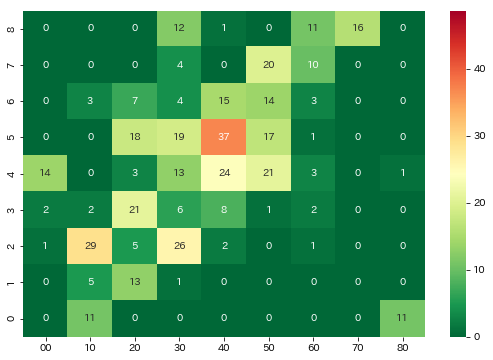

In [17]:
create_contour_base(array3d['p10000']['r4']['s123']['estimate'][target_time])

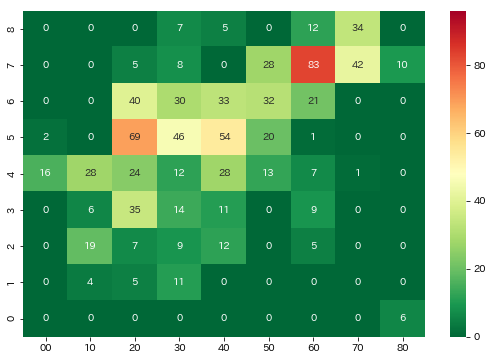

In [18]:
create_contour_base(array3d['p10000']['r4']['s123']['od'][target_time])

In [11]:
for _times in env.TIMES_LIST():
    df = csv_array['p10000']['r4']['s123']
    estimate = df['estimate'][_times]['people'].sum().sum()
    od = df['od'][_times]['people'].sum().sum()
    print(_times)
    print(estimate, ', ', od, '\n')

3600
438.0 ,  864.0 

7200
670.0 ,  2167.0 

10800
617.0 ,  2250.0 

14400
623.0 ,  2113.0 

18000
523.0 ,  1532.0 

21600
462.0 ,  996.0 

